# Top 100 Words Closest to "Queer" for Fitzgerald

In [81]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [91]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [37]:
#loading txt file and turning it into courpus

# class MyCorpus:
#     def __iter__(self):
#         corpus_path = datapath('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\fitzgeraldcorpus.txt')    
#         for line in open(corpus_path, encoding = 'latin-1'):
#             yield gensim.utils.simple_preprocess(line)

# import gensim.models

# sentences = MyCorpus()

In [38]:
# %%time
# model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 2min 18s


In [112]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\fitzgeraldcorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 615126


In [92]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [93]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\fitzgeraldcorpus.txt', encoding = 'latin-1') as f:
    flines = f.readlines()

In [94]:
fparagraphs = paragraphize(flines)

83012 11290


In [95]:
for i in range(1):
    fsample = choices(fparagraphs, k = len(fparagraphs))
    class MyCorpus:
            def __iter__(self):
                global fsample    
                for line in fsample:
                    yield gensim.utils.simple_preprocess(line)

    sentences = MyCorpus()


In [96]:
%%time
model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 1min 47s


In [8]:
# Save the model
#model.save("fitzgerald_word2vec.model")

In [54]:
# Load the model
#model = gensim.models.Word2Vec.load("fitzgerald_word2vec.model")

In [109]:
len(model.wv.vocab)

7480

In [97]:
vector = model.wv['queer']  # get numpy vector of queer

In [98]:
sims = model.wv.most_similar('queer', topn=100)  # get top100 similar words
sims

[('upset', 0.3347266614437103),
 ('alley', 0.3284446597099304),
 ('nevertheless', 0.32388854026794434),
 ('accepts', 0.32290947437286377),
 ('remarkable', 0.317508727312088),
 ('live', 0.3127584457397461),
 ('swell', 0.3120143413543701),
 ('crest', 0.3082897961139679),
 ('shaken', 0.3066481053829193),
 ('scared', 0.29896098375320435),
 ('doing', 0.2989446520805359),
 ('luck', 0.29440099000930786),
 ('rapidly', 0.2911469340324402),
 ('pang', 0.28838446736335754),
 ('becomes', 0.28834259510040283),
 ('directly', 0.2875523567199707),
 ('kay', 0.2870851457118988),
 ('brave', 0.2844519019126892),
 ('confidently', 0.2844092845916748),
 ('realize', 0.28355759382247925),
 ('dangerous', 0.2824859023094177),
 ('stuck', 0.2810373604297638),
 ('result', 0.2792414128780365),
 ('reconciled', 0.27782195806503296),
 ('hide', 0.27467021346092224),
 ('shell', 0.2734648883342743),
 ('none', 0.2689463496208191),
 ('paralyzed', 0.2669536769390106),
 ('impossible', 0.26593706011772156),
 ('understand', 0.26

In [99]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [100]:
fitzgerald_queersimilar = df_new[0].tolist()
#fitzgerald_queersimilar # get top 100 words as a list
fitzgerald_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [101]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [102]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [103]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in fitzgerald_queersimilar:
    vectordict[v] = model.wv[v]

In [104]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alley,0.795057,-1.510313,-0.977954,0.660140,1.027279,-1.608196,3.981573,-1.057464,-0.007446,-0.149233,...,0.257420,1.648049,-0.547655,-2.781445,2.244696,-0.034633,-2.371545,0.929903,0.752184,1.306353
nevertheless,-0.453079,-1.336031,1.948987,-0.011091,2.086767,-1.900702,-0.729166,-0.468579,-0.326840,-1.974841,...,1.739016,1.678452,2.871836,1.326530,-0.601326,0.469975,0.346898,0.272648,0.354788,-0.243571
accepts,0.184135,-0.541985,0.351528,0.531502,-0.047134,-0.425903,-0.336427,-0.459361,1.420227,0.812685,...,1.823125,-0.690019,1.154633,0.084559,0.109023,0.413651,0.040966,-0.321013,-0.601620,-0.120359
remarkable,1.445437,-0.435369,0.320888,-0.281756,0.966865,-0.860335,-0.410772,-1.676784,0.333934,-1.483145,...,2.047919,-0.575525,-0.003183,-0.140734,0.004418,0.050827,-1.647865,2.002799,-2.375826,-0.099659
live,-3.249683,0.522356,-2.702736,2.380550,3.383247,-1.267902,1.178834,-2.959564,1.586929,-0.439359,...,0.584264,-1.050130,2.179904,-2.556575,2.245281,3.184904,-0.519773,-0.034577,2.387414,-1.220935
swell,1.301378,1.133256,-1.853118,1.059455,0.923280,-3.234797,-0.006824,-1.833978,0.672493,-0.722522,...,-0.474669,-0.726783,-0.587817,0.792697,3.121146,-1.408994,-1.043911,-1.145565,-1.551394,-0.149236
crest,0.581873,0.523488,-0.395079,0.507618,-1.678561,-0.204306,0.560425,-0.772133,-0.028486,-0.538931,...,0.715162,-0.526613,0.756585,-1.542287,-0.304009,0.943703,-0.122875,-0.957831,-0.742346,-0.499991
shaken,-0.115488,-0.624225,-0.556089,-0.236493,0.010939,-1.291601,-1.627257,-1.690097,3.368648,0.568768,...,0.595029,-0.909881,0.911120,0.751724,0.923651,-0.561187,-0.561115,-1.209815,0.570612,-0.236961
scared,1.850927,-2.098647,-1.902650,1.761722,-0.233935,0.100690,0.168766,-0.527444,0.371339,-1.447712,...,-0.161238,1.134770,-0.133626,1.333181,-0.407724,-0.215469,-0.151561,-0.413286,-0.671771,1.477644
doing,1.369118,1.720961,-5.344011,-1.902543,0.790935,-3.196136,1.979482,1.939395,3.454870,-0.669207,...,0.780340,-1.860162,-2.255924,1.497855,0.592018,1.612754,0.399203,-0.438335,-3.173804,0.592503


In [105]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(fitzgerald_queersimilar):
    
    vectordict = dict()
    for v in fitzgerald_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = fitzgerald_queersimilar)
    
    return plotframe

In [106]:
plotframe = vocab2pca(fitzgerald_queersimilar)
plotframe

,x,y
upset,-0.404473,-0.268405
alley,0.337595,-0.126125
nevertheless,-0.103215,0.187599
accepts,0.140679,0.277652
remarkable,-0.196462,-0.120900
live,-0.163370,-0.243889
swell,-0.258705,-0.100814
crest,0.399144,-0.042217
shaken,-0.045350,0.276138
scared,-0.324913,0.062539


In [107]:
negativelist_fitzgerald = [w for w in fitzgerald_queersimilar if w in negative_words]
#negativelist_fitzgerald.remove('queer')
positivelist_fitzgerald = [w for w in fitzgerald_queersimilar if w in positive_words]
neutrallist_fitzgerald = [w for w in fitzgerald_queersimilar if w not in (negative_words + positive_words)]

In [108]:
plotframe_negative_fitzgerald = vocab2pca(negativelist_fitzgerald)
plotframe_positive_fitzgerald = vocab2pca(positivelist_fitzgerald)
plotframe_neutral_fitzgerald = vocab2pca(neutrallist_fitzgerald)
plotframe_negative_fitzgerald
plotframe_queer_fitzgerald = plotframe_negative_fitzgerald[(plotframe_negative_fitzgerald.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_fitzgerald = plotframe_negative_fitzgerald.drop(['queer']) #drop 'queer' from plotframe_negative_fitzgerald
plotframe_negative_fitzgerald['sentiment']='negative' #add sentiment columns 
plotframe_positive_fitzgerald['sentiment']='positive'
plotframe_neutral_fitzgerald['sentiment']='neutral'
plotframe_queer_fitzgerald['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_fitzgerald,plotframe_positive_fitzgerald,plotframe_neutral_fitzgerald,plotframe_queer_fitzgerald]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
upset,0.289642,0.427976,negative
scared,0.186737,0.340505,negative
dangerous,0.142571,0.263152,negative
stuck,0.346262,-0.266812,negative
paralyzed,0.275084,-0.176940,negative
impossible,-0.239516,-0.136590,negative
insecure,-0.429100,-0.406277,negative
splitting,0.229151,-0.193119,negative
ridiculous,-0.086380,0.358989,negative
dismal,-0.349104,0.241772,negative


### Visualization

In [110]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=10, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Fitzgerald)', fontsize=15)
    plt.savefig('queersentiment_fitzgerald_04282022.png')
    plt.show()

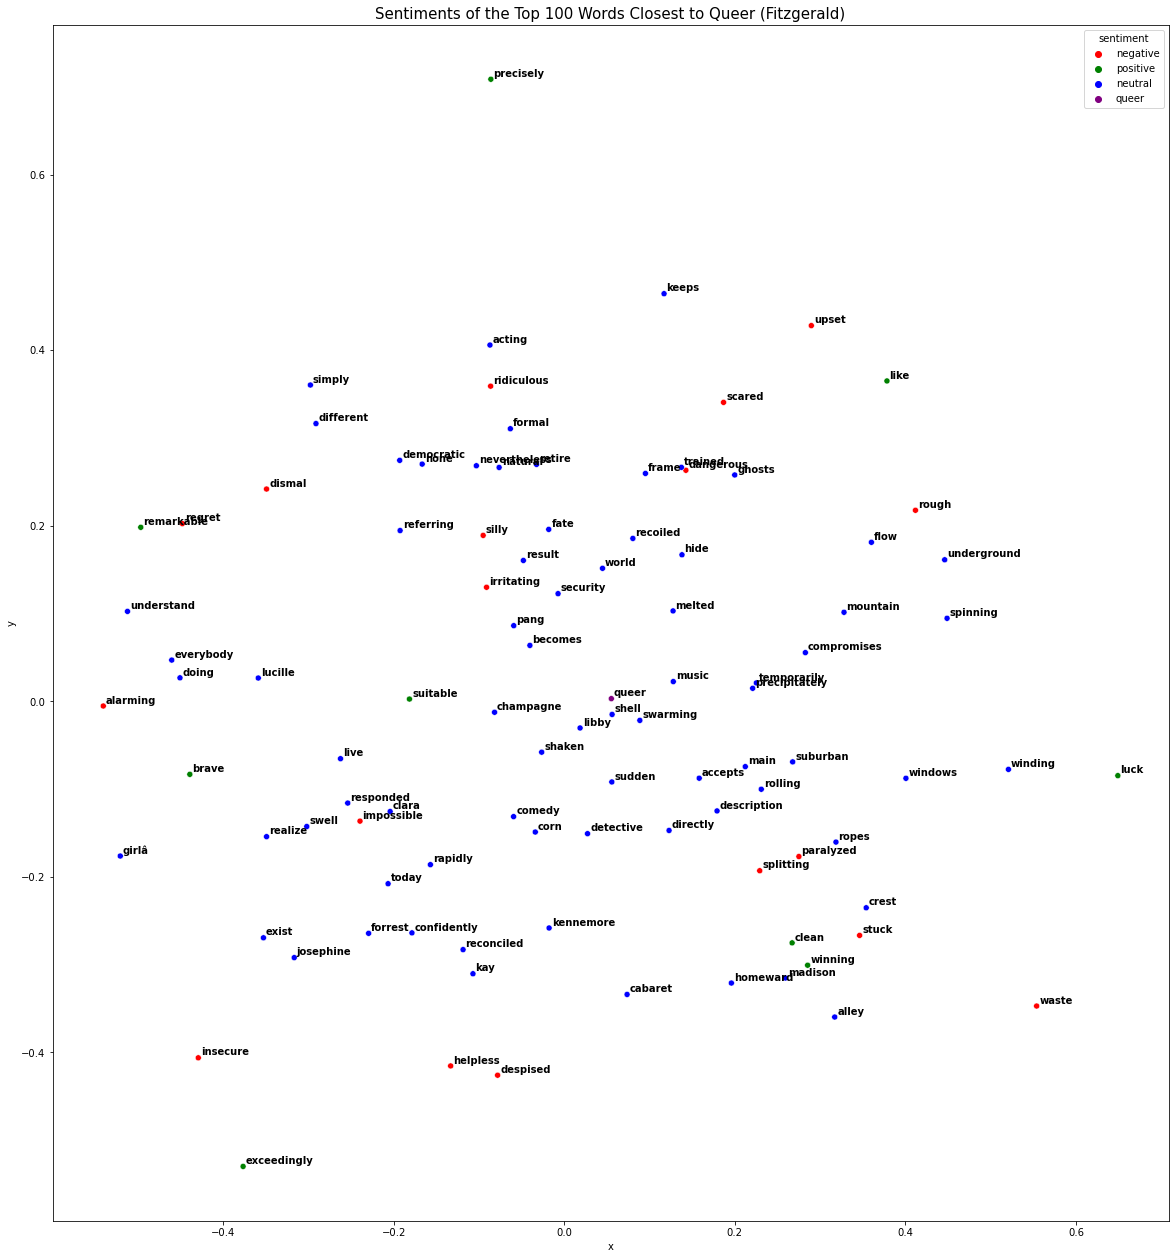

In [111]:
plot_the_frame(plotframe_sentiment)